# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [2]:
data.keys()

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [3]:
# pandas.describe() only looks at columns that have numeric entries
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [4]:
np.unique(np.array(data['income']))

array(['<=50K', '>50K'], dtype=object)

In [5]:
# converting income from a sting into a numeral
# '>=50k' will be the positive class
# '<=50k' will be the negative class
# this code is similar to that in 'Bayesian_Inference' in practice_projects folder
data['income']=data.income.map({'>50K':1,'<=50K':0})

<Figure size 432x288 with 0 Axes>

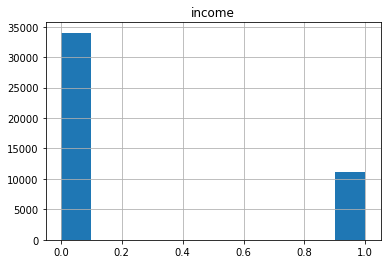

In [6]:
import matplotlib.pyplot as plt

plt.figure()
data.hist(column=['income'])
plt.show()

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [7]:
# converting data to a numpy array
dat=np.array(data)

In [8]:
# verifying that the column with index=12, corresponds to the 'native-country' column of data
# this will imply that the 13th column corresponds to income label
dat[0:3,12]

array([' United-States', ' United-States', ' United-States'], dtype=object)

In [9]:
# TODO: Total number of records
n_records = dat.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = np.sum(dat[:,13])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = np.sum(1-dat[:,13])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k*100/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

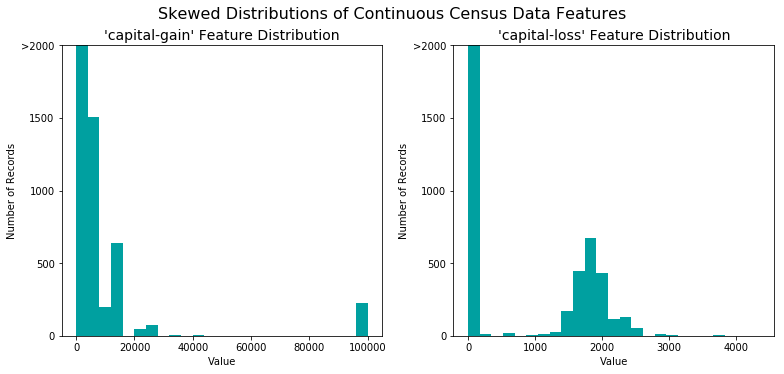

In [10]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

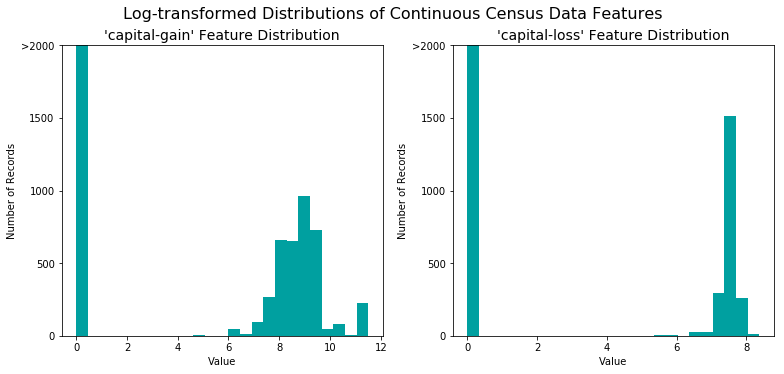

In [11]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [12]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [13]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
# Note that I already did this right in the begining 

income = data['income']

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most $\$50,000$, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [15]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
TP=np.sum(income)
FP=np.sum(1-income)
TN=0
FN=0

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = 1
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
fscore = (1+beta**2)*precision*recall/(beta**2 * precision+recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, Precision score: {:.4f} F-score: {:.4f}]".format(accuracy, precision, fscore))

Naive Predictor: [Accuracy score: 0.2478, Precision score: 0.2478 F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: ** 

I plan to use SVM, decision trees and random forest for analysing the problem at hand. In the following we will outline some of the  the applications, advantages, limitations and reasons for our choice of these models. 

**SVM:**
- **Real-world application:** Support Vector Machines have been shown to be very effective in areas such as 

 1) text classifiers where the objective is to classify a given document into predefined number of categories[1]. 

 2) In the field of bioinformatics for example for purposes of in "protein subcellular localization prediction", where the    objective is to predict subcellular localization of proteins from their amino acid compositions [2]. 

 3) Also, see [3] where the authors give an account of their success in using SVM to diaganose the diseases afflicting apple plants. 


- **Strengths:** 

 1) For SVM, the knowledge of a few support vectors is enough to find the hyperplane that best divides the given classes in the feature space. This allows SVM to be particularly suitable for cases where number of data points is much less than the number of features be used to describe the data [4].

 2) SVMs are large margin classifiers. This allows them to find the most optimal classification rules for the underlying data [5]. This also implies that the seperating hyperplanes are not unstable in nature [4]. 
 
  3) In some applications, SVMs turn out to be faster than many other machine learning paradigms such as nueral networks, decision trees and at times even the naive Bayes classifier [4].
 
 
- **Limitations:**
 
 1) One of the biggest limitation of SVMs is that, it is usually not easy to visualize/understand the underlying model generated by the SVM to achieve classification. This limits the intuition a developer can obtain about the task at hand. This will make it difficult to find answers to questions such as what other data should be collected in order to improve the performance of our task.
 
 2) The regularization parameter C in SVM can be hard to choose a priori i.e. for a given problem the range of possible values for C is not always clear [7].

 3) They take a long time to train and are memory intensive, if the dataset is particularly large. This is because for a dataset with n samples, the kernel is an n $\times$ n matrix, which implies that memory requirements scale quadratically with the data [8].
 
 4) SVM are very sensitive to the scaling of data and require all the features to vary on a similar scale. This makes adequate preprocessing of data very important when applying SVMs.


- **Usefulness for the current problem:** The ability of SVMs to work with large feature-spaces, such as in the present case, and yet find the most optimal and stable seperating hyperplane and their relatively low risk of over-fitting makes me hopeful that using an SVM will be quite helpful.  

**DecisionTree:**

- **Real-world application:** Decision trees have been used in a variety of areas for e.g.

 1) Application in chemistry, where they were used to assess certain chemical properties such as the research octane number (RON) of a molecule based on information about the presence/absence of various substructures in the molecule [10].
 
 2) Analysing images from the Hubble Space Telescope (HST): The authors of [11] used decision trees to filter out cosmic ray hits recorded in HST images. These cosmic-ray hits often look like faint stars thereby becoming a source of unwanted noise. Thus the task at hand is to differentiate between cosmic-ray hits and stars. They reported a top success rate of $95\%$ in identifying cosmic ray hits.
 
 
- **Strengths:** 

 1) Decision trees require very little preprocessing of data 
  
 2) A frequent problem that afflicts machine learning tasks is that of unbalanced classes, with the classifier often tending to favor the larger class [12]. Turns out decision trees tend to be less sensitive to such skews in the data. Their performance can be further enhanced upon using sampling methods. 
 
 3) The model produced by a decision tree is often simple to understand. This can then be used to derive useful insights about the specific classification problem. These insights can then be used to futher improve the performance.
 
 4) The computational cost of decision trees scales logarithmically with data size. This implies decision trees can produce results faster and more efficiently when applied to large data sets (compare this to the quadratic growth in computational cost of SVMs).
 
 
- **Limitations:**

 1) One big disadvantage to decision trees is that it is very easy to overfit the data. 
 
 2) Decision trees tend to be unstable towards small variations in data
 
 3) Decision trees have too many hyperparameters that can be tuned e.g. max_depth, min_samples_split, min_samples_leaf etc. This makes it hard to find the approriate set of parameters for a given problem. 
 
 4) The large number of hyperparameters in decision trees also makes it difficult to compare the overall model complexity of different decision trees with different hyperparameters. This becomes particularly important in cases such as when two decision trees have almost the same cross-validation score but have different sets of hyperparameter-values. In such a case we would like to choose the less complex model since it will have less over-fitting, however such a decision might not always be easy to make in decision trees.  
 

- **Usefulness for the current problem:** Given that the number positive instances in the present data is only about $25\%$, it therefore implies that the problem of skewed data will greatly affect our results. The ability of decision trees to work well in such scenarios thus makes it one of the ideal candidates for the current task. At the same time, I am hopeful that the model produced by decision trees will provide insights which can applied to other models as well, thereby helping in improve their performance in general.  

**Random Forest**

- **Real-world application:** Some areas where random forest have become popular are

 1) Applying random forest to gene expression data to classify cells into being tumorous or not [13,14]
 
 2) Random Forest in remote sensing tasks [15] such as analysing satellite images to extract information about tree canopy cover and biomass [16].
 

- **Strengths:**

 1) Since random forests operate through contructing an ensemble to decision trees, thus they also inherit many of their strengths, such as the ability to work with skewed classes as well as requiring almost no preprocessing of data.
 
 2) At the same time they are able to reduce the problem of overfitting that strongly afflicts decision trees. 
 
 3) The feature importances provided by random forest are more reliable than the one provided by a single tree [17]. 
 
 4) Since each tree in the random forest can be built independently, thus one can easily use parallel computing techniques to reduce the computation time
 
 5) Random forest are robust to outliers and do not require the data to follow a normal distribution[13] 
  

- **Limitations:** 

 1) Given the large number of trees in the forest, it is difficult to inpterpret the rules learnt by a random forest to arrive at its predictions for a given data. 
 
 2) They are highly sensitive to the setting of random_state. This problems gets somewhat alleviated if the number of trees in the forest is increased. However this then comes at the expense of an increase in consumption of computational resourses.
 
 3) They don't perform so well on sparse data i.e. when the number of samples is much less than the number of features, as is the case with text data [17]. 
 
 

- **Usefulness for the current problem:** Since random forest inherit a decision tree's ability to work with skewed data, while somewhat mitigating the problem of overfitting as well as providing a more reliable measure of feature importance, I believe that they will be quite usefull in analysing the current problem. 






**References:** 

 1) JOACHIMS, T. (2002). Learning to Classify Text Using Support Vector Machines. Kluwer, Boston.
 
 2) HUA,S. and SUN, Z. (2001). Support vector machine approach for protein subcellular localization prediction. 
    Bioinformatics 17 721–728
    
 3) M. A. Khan et al., "An Optimized Method for Segmentation and Classification of Apple Diseases based on Strong Correlation       and Genetic Algorithm based Feature Selection," in IEEE Access. doi: 10.1109/ACCESS.2019.2908040   
 
 4) Moguerza, Javier M., and Alberto Muñoz. “Support Vector Machines with Applications.” Statistical Science, vol. 21, no. 3,       2006, pp. 322–336. JSTOR, www.jstor.org/stable/27645765.
 
 5) Lin, Y. Data Mining and Knowledge Discovery (2002) 6: 259. https://doi.org/10.1023/A:1015469627679
 
 6) Burges, C.J. Data Mining and Knowledge Discovery (1998) 2: 121. https://doi.org/10.1023/A:1009715923555
 
 7) Suykens J.A.K., Horvath G., Basu S., Micchelli C., Vandewalle J., Advances in Learning Theory, Vol. 190, IOS Press (2003), p. 180
 
 8) https://stats.stackexchange.com/questions/314329/can-support-vector-machine-be-used-in-large-data
 
 9) https://doi.org/10.1016/B978-012443880-4/50047-8
 
 10) Edward S. Blurock, Automatic learning of chemical concepts: Research octane number and molecular substructures, Computers & Chemistry, Volume 19, Issue 2, 1995, Pages 91-99, https://doi.org/10.1016/0097-8485(95)00001-9
 
 11) Steven Salzberg et al 1995 PASP 107 279, https://doi.org/10.1086/133551
 
 12) Cieslak D.A., Chawla N.V. (2008) Learning Decision Trees for Unbalanced Data. In: Daelemans W., Goethals B., Morik K. (eds) Machine Learning and Knowledge Discovery in Databases. ECML PKDD 2008. Lecture Notes in Computer Science, vol 5211. Springer, Berlin, Heidelberg
 
 13) Adele Cutler, John R. Stevens,Random Forests for Microarrays,Methods in Enzymology,Academic Press,Volume 411,2006,Pages 422-432,https://doi.org/10.1016/S0076-6879(06)11023-X.
 
 14) Xi Chen, Hemant Ishwaran, Random forests for genomic data analysis, Genomics, Volume 99, Issue 6, 2012, Pages 323-329,,
https://doi.org/10.1016/j.ygeno.2012.04.003.

 15) Mariana Belgiu, Lucian Drăguţ, Random forest in remote sensing: A review of applications and future directions, ISPRS Journal of Photogrammetry and Remote Sensing, Volume 114, 2016, Pages 24-31, https://doi.org/10.1016/j.isprsjprs.2016.01.011.

 16) M. Karlson, M. Ostwald, H. Reese, J. Sanou, B. Tankoano, E. Mattsson, Mapping tree canopy cover and aboveground biomass in Sudano-Sahelian woodlands using landsat 8 and random forest, Remote Sens., 7 (2015), p. 10017
 
 17) Introduction to Machine Learning with Python: A Guide for Data Scientists, By Sarah Guido, Andreas Müller

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

In [17]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    #learner = None
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [18]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.


C:\Users\agarw\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


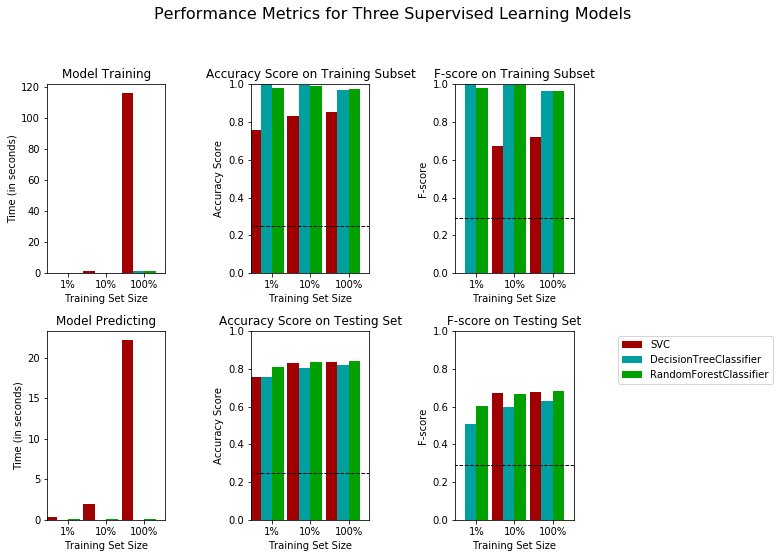

In [19]:
# TODO: Initialize the three models

# seeding value for random_state
seed=42

clf_A = SVC(random_state=seed)
clf_B = DecisionTreeClassifier(random_state=seed)
clf_C = RandomForestClassifier(random_state=seed)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = len(y_train)//10
samples_1 = len(y_train)//100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [20]:
results['SVC'][2]

{'train_time': 115.96824932098389,
 'pred_time': 22.221571683883667,
 'acc_train': 0.8533333333333334,
 'acc_test': 0.8371475953565506,
 'f_train': 0.7196969696969697,
 'f_test': 0.6744771706996605}

In [21]:
results['DecisionTreeClassifier'][2]

{'train_time': 1.4082317352294922,
 'pred_time': 0.01795363426208496,
 'acc_train': 0.97,
 'acc_test': 0.8185737976782753,
 'f_train': 0.9638554216867471,
 'f_test': 0.627947840562286}

In [22]:
results['RandomForestClassifier'][2]

{'train_time': 1.34824800491333,
 'pred_time': 0.08383035659790039,
 'acc_train': 0.9733333333333334,
 'acc_test': 0.843338861249309,
 'f_train': 0.9672619047619047,
 'f_test': 0.6847793152206848}

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

In order to answer the question, it is interesting and perhaps helpful to make the following few observations about the results:

**Performance on unbalanced data**

- Notice that SVC has an F-score 0 when trained on just 1% of the total training data. Upon further investigation (steps not shown here, but can be easily implemented if desired), we found that in this case the SVC had classified everybody to be in the negative class with no predictions at all for the positive class. There  being missing classes in the predictions also triggered the warning " UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples." in this case. This highlights the problems that SVC and many other machine learning models face when dealing with unbalanced data, specially when the training set itself consist of a small number of samples. This seems to get somewhat alleviated when the sample size is increased.

- On the otherhand, decision trees and random forest doesn't seemed to be plagued too badly by this imbalance in the data. Notice that we had already mentioned this as one of the key strengths of these classifiers.

**Problem of overfitting**

- Notice that the accuracy and the f-score of both decision trees and random forest undergoes a large drop when going from training set to the test set. This highlights the tendency of decision tree based classifiers to by-heart their training data, hence leading to large overfitting when compared to other machine learning techniques. 

- In comparison, the change in the accuracy and f-score of SVC is not as large when going from the training set to the test set, showing that the seperating planes found by SVC is usually optimal and does not over-fit the training data as strongly.

**Computing time**

- We notice that SVC takes quite a long time to train and predict, while decision trees and random forests only take a miniscule fraction of that time.

- On the otherhand, there is not much of the difference in the performance of SVC and random forests. Both of them have almost the same accuracy and F-score on the test set when at least $10\%$ of the training sample was used to train the machine. 

- Thus in terms of consumption of computing resources, random forest are much better than SVC.

**F-score on test data**

- let us quickly tabulate here the test data F-score of the 3 models when using $100\%$ training data: 
- SVC: 0.675
- DecisionTreeClassifier: 0.628
- RandomForestClassifier: 0.685

Based on the above observations and the fact that upon using $100\%$ data, the RandomForestClassifier gives the highest F-score on the test data while at the same time consuming very little time, we conclude that for the present scenario, the RandomForestClassifier will be most appropriate.  

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

**Random Forest:**

- *Summary for layman with no machine learning experience:*

Let's begin by quickly explaining what a decision tree is. In essence it is like playing the game of 20 questions [3]. The aim is to ask questions such that they can help us narrow down the space of possibilities and make an educated guess about the correct answer. Of course the less number of questions you have to ask, the better it is. The response to each question then becomes the basis for the next question. 

For example if the game is to be to guess if a (hidden) object is a cat or a dog or a whale, we can start by asking if the animal lives on land or in water. If the answer is water, then we are done already as it has to be a whale. But if the response is land, then we can further ask if it can bark. This will then immediately tell us if it is a dog or a cat. 

This is exactly what decision trees do, except that they are not limited to asking just 20 questions and in principle can ask as many questions as are necessary. 

Furthermore, in order to teach a computer how to do this, we show it a bunch of initial data along with the corresponding answers. The computer then comes up with a series of questions that it can ask so as to arrive at the correct answer in as many cases as it can. However, as is common experience with anybody, if we choose our questions to be too specific to the initial set of examples presented to us, then the questions we learn to ask will not be as helpful when we are presented with a slightly different scenario. This is called overfitting. Turns out, when building decision trees, computers often tend to overfit to the examples provided to them for training purposes. 

This overfitting can be reduced by using the idea of random forests. The idea is, that the computer is now told to build a large number of different trees. Each tree is now shown only a subset of all the training examples. At the same time, each individual tree is allowed to harness only part of the total information available about these examples. Thus each decision tree is prevented from overfitting as it can only ask questions pertaining to the information it is allowed to see. Some trees will therefore get the answer right, while some others might not. In the end the answer given by the majority of the trees is chosen as the final answer. The philosophy here is no different from that employed when a contestant of a game-show asks for an audience poll to answer a question. The expectation being that, while an individual tree/person might base their decision making process on slightly different knowledge and experiences, the aggregate knowledge and experience of a large number of decision makers will usually provide the correct answer in most of the cases [1, 2]. 




- *Summary for Machine learning beginners:*

The idea behind random forest is to build and train many different decision trees in a randomized fashion. In this way an ensemble of trees is created each of which slightly different from others and makes predictions based on different aspects of the dataset. In scikit-learn the final prediction is then made by aggregating over the class-probability predictions made by the trees in the forest [3].

There are two key ways in which randomization is implemented in random forests:

 1) Each tree is trained on slightly different data. Basically, given a training dataset with n samples, training samples are drawn randomly with replacement. This means that the drawn sample is NOT culled from the training set, thereby making it possible for the same sample to be drawn again in the later drawings. In this way a new training set of n samples is built for each tree. However, in general the training set for each tree will be slightly different with some samples appearing mutliple times while some other sample points missing from its dataset. This is called bootstrap sampling [4].
 
 2) At the same time, for each tree only a subset of randomly chosen features is used for the decision making process. 

The objective behind building multiple different trees is to reduce the problem of over-fitting that plagues decision trees . The idea being that due to bootstrap sampling and usage of only a subset of features (which might not always be the most important features for our task), the bias of some trees will get slightly amplified while other might overfit the data more, in the end, however, the averaging of final results will cause these to cancel against each other, producing a much better result.   

**References**

 1) https://eight2late.wordpress.com/2016/09/20/a-gentle-introduction-to-random-forests-using-r/
 
 2) https://www.quora.com/What-is-Gradient-Boosting-Models-and-Random-Forests-using-layman-terms

 3) https://scikit-learn.org/stable/modules/ensemble.html#forest
 
 4) Introduction to Machine Learning with Python: A Guide for Data Scientists, By Sarah Guido, Andreas Müller

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [23]:
# Here onwards the code will produce multiple warnings about changes to default values in the future versions
# Having checked that my implementation works without a problem, for ease of display, I now wish to suppress the warnings
# this can be done in the following way
import warnings
warnings.filterwarnings('ignore')

# I learnt about this from the following stackoverflow post: https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [24]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=seed)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[10,30,100],'min_samples_split':[30,50,70],'min_samples_leaf':[1,3,10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("The best estimator was: ", best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.8433
F-score on testing data: 0.6848

Optimized Model
------
Final accuracy score on the testing data: 0.8595
Final F-score on the testing data: 0.7293
The best estimator was:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model | Naive Predictor  |
| :------------: | :---------------: | :-------------: | : ------------ : |
| Accuracy Score |    0.8433         |   0.8595        |      0.2478      |   
| F-score        |    0.6848         |   0.7293        |      0.2917      |


**Answer: **

By comparing the Accuracy and F-score of the Unoptimized model, Optimized model and the Naive Predictor, as given in the above table, we can see that:

 1) The optimized model obtained from grid search has a slightly better accuracy but a much better F-score than the unoptimized model. 

 2)The optimized model as well as the unoptimized model have a far better accuracy and F-score than the naive predictor we considered in Question 1.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### <font color=green> EDA to undetstand how the various features affect income </font>

**Plotting the continuous features against income**

<Figure size 432x288 with 0 Axes>

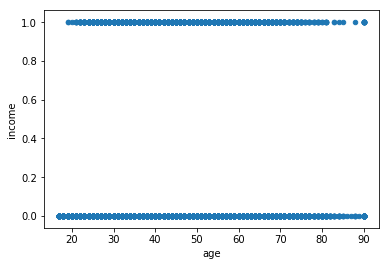

In [25]:
# age vs income
plt.figure()
data.plot(x='age',y='income',kind='scatter')
plt.show()

In [26]:
data.groupby('income')['age'].mean()

income
0    36.749427
1    44.006067
Name: age, dtype: float64

<Figure size 432x288 with 0 Axes>

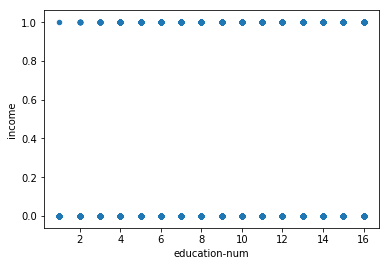

In [27]:
# education-num vs income
plt.figure()
data.plot(x='education-num', y='income', kind = 'scatter')
plt.show()

In [28]:
data.groupby('income')['education-num'].mean()

income
0     9.630770
1    11.598501
Name: education-num, dtype: float64

<Figure size 432x288 with 0 Axes>

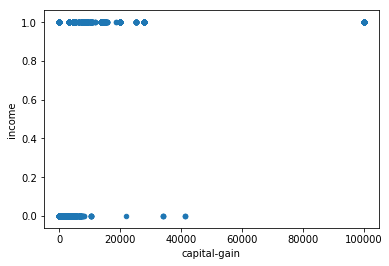

In [29]:
# capital-gain vs income
plt.figure()
data.plot(x='capital-gain',y='income',kind='scatter')
plt.show()

In [30]:
data.groupby('income')['capital-gain'].mean()

income
0     149.023402
1    3991.791667
Name: capital-gain, dtype: float64

<Figure size 432x288 with 0 Axes>

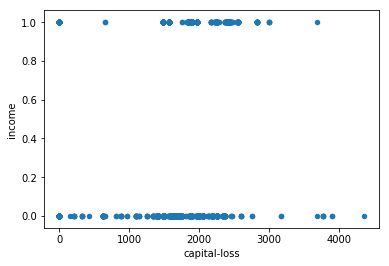

In [31]:
# capital-loss vs income
plt.figure()
data.plot(x='capital-loss',y='income',kind='scatter')
plt.show()

In [32]:
data.groupby('income')['capital-loss'].mean()

income
0     54.032428
1    193.487063
Name: capital-loss, dtype: float64

<Figure size 432x288 with 0 Axes>

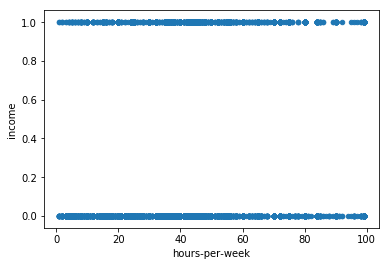

In [33]:
# hours-per-week vs income
plt.figure()
data.plot(x='hours-per-week', y='income', kind='scatter')
plt.show()

In [34]:
data.groupby('income')['hours-per-week'].mean()

income
0    39.372023
1    45.690489
Name: hours-per-week, dtype: float64

In [35]:
# looks like education-num is nothing but an integer representation of education_level
# This can also be seen from the fact that education-num takes 16 integers as its values while there are 16 categories in education_level
# The higher is someone's education_level, the higher is their education_num
data.groupby('education_level')['education-num'].mean()

education_level
 10th             6.0
 11th             7.0
 12th             8.0
 1st-4th          2.0
 5th-6th          3.0
 7th-8th          4.0
 9th              5.0
 Assoc-acdm      12.0
 Assoc-voc       11.0
 Bachelors       13.0
 Doctorate       16.0
 HS-grad          9.0
 Masters         14.0
 Preschool        1.0
 Prof-school     15.0
 Some-college    10.0
Name: education-num, dtype: float64

**categorical variables vs income** 

A little thought reveals that the fraction of people earning more than 50k is equal to the mean income of that category. This can easily be computed by using groupby method of pandas.Dataframe 

In [36]:
data.groupby('education_level')['income'].mean()

education_level
 10th            0.067048
 11th            0.054972
 12th            0.074523
 1st-4th         0.036036
 5th-6th         0.048998
 7th-8th         0.066829
 9th             0.056213
 Assoc-acdm      0.264101
 Assoc-voc       0.257274
 Bachelors       0.419815
 Doctorate       0.733456
 HS-grad         0.163431
 Masters         0.554097
 Preschool       0.013889
 Prof-school     0.754140
 Some-college    0.201030
Name: income, dtype: float64

In [37]:
data.groupby('education-num')['income'].mean()

education-num
1.0     0.013889
2.0     0.036036
3.0     0.048998
4.0     0.066829
5.0     0.056213
6.0     0.067048
7.0     0.054972
8.0     0.074523
9.0     0.163431
10.0    0.201030
11.0    0.257274
12.0    0.264101
13.0    0.419815
14.0    0.554097
15.0    0.754140
16.0    0.733456
Name: income, dtype: float64

In [38]:
data.groupby('marital-status')['income'].mean()

marital-status
 Divorced                 0.104018
 Married-AF-spouse        0.437500
 Married-civ-spouse       0.454239
 Married-spouse-absent    0.097826
 Never-married            0.048020
 Separated                0.070163
 Widowed                  0.094753
Name: income, dtype: float64

In [39]:
data.groupby('occupation')['income'].mean()

occupation
 Adm-clerical         0.136462
 Armed-Forces         0.285714
 Craft-repair         0.225083
 Exec-managerial      0.479111
 Farming-fishing      0.116216
 Handlers-cleaners    0.065982
 Machine-op-inspct    0.122896
 Other-service        0.040765
 Priv-house-serv      0.012931
 Prof-specialty       0.450067
 Protective-serv      0.314549
 Sales                0.269046
 Tech-support         0.289437
 Transport-moving     0.206390
Name: income, dtype: float64

In [40]:
data.groupby('relationship')['income'].mean()

relationship
 Husband           0.455748
 Not-in-family     0.104939
 Other-relative    0.037064
 Own-child         0.015847
 Unmarried         0.063074
 Wife              0.485892
Name: income, dtype: float64

In [41]:
data.groupby('race')['income'].mean()

race
 Amer-Indian-Eskimo    0.121839
 Asian-Pac-Islander    0.283193
 Black                 0.126301
 Other                 0.127479
 White                 0.262371
Name: income, dtype: float64

In [42]:
data.groupby('sex')['income'].mean()

sex
 Female    0.113576
 Male      0.312477
Name: income, dtype: float64

In [43]:
data.groupby('native-country')['income'].mean()

native-country
 Cambodia                      0.346154
 Canada                        0.368098
 China                         0.318584
 Columbia                      0.048780
 Cuba                          0.255639
 Dominican-Republic            0.051546
 Ecuador                       0.139535
 El-Salvador                   0.074830
 England                       0.394958
 France                        0.444444
 Germany                       0.300518
 Greece                        0.367347
 Guatemala                     0.034884
 Haiti                         0.130435
 Holand-Netherlands            0.000000
 Honduras                      0.105263
 Hong                          0.285714
 Hungary                       0.333333
 India                         0.421769
 Iran                          0.392857
 Ireland                       0.277778
 Italy                         0.330000
 Jamaica                       0.135922
 Japan                         0.348315
 Laos                    

**Some histograms**

<Figure size 432x288 with 0 Axes>

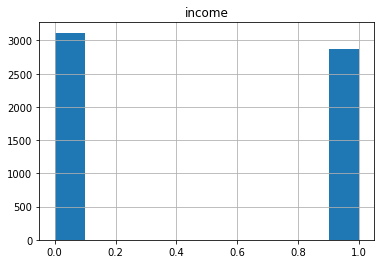

In [44]:
# income of Exec-managers
plt.figure()
data[data['occupation']==' Exec-managerial'].hist(column=['income'])
plt.show()

<Figure size 432x288 with 0 Axes>

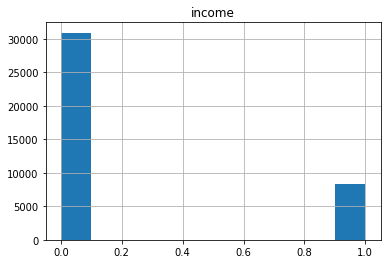

In [45]:
# income of non-Exec-managers
plt.figure()
data[data['occupation'] != ' Exec-managerial'].hist(column=['income'])
plt.show()

**heatmaps of correlations**

In [46]:
# creating a heat-map of correlations between various columns in the dataframe
# using instructions from https://ajh1143.github.io/Corr/
# importing seaborn for its heatmap function
import seaborn as sns

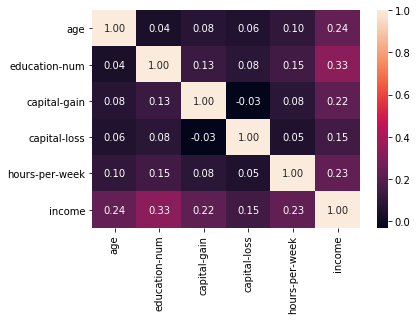

In [47]:
# using seaborn to create the heatmap
# this will only use the columns containing numerical values 
# thus, the categorical variables will be ignored
data_corr=data.corr()
plt.figure()
sns.heatmap(data_corr,annot=True, fmt='.2f')
plt.show()

In [48]:
# heatmap for categorical variables can be generated by One-Hot encoding them 
data_workclass=pd.get_dummies(data.loc[:,['workclass','income']])
data_workclass.keys()

Index(['income', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay'],
      dtype='object')

In [49]:
# apparently there are no enteries where 'workclass' is  'Never-worked'
np.unique(data['workclass'])

array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)

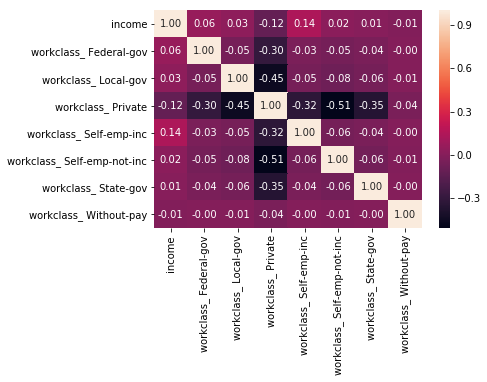

In [50]:
# heat-map for various categories in workclass
data_workclass_corr=data_workclass.corr()
plt.figure()
sns.heatmap(data_workclass_corr, annot=True, fmt='.2f')
plt.show()

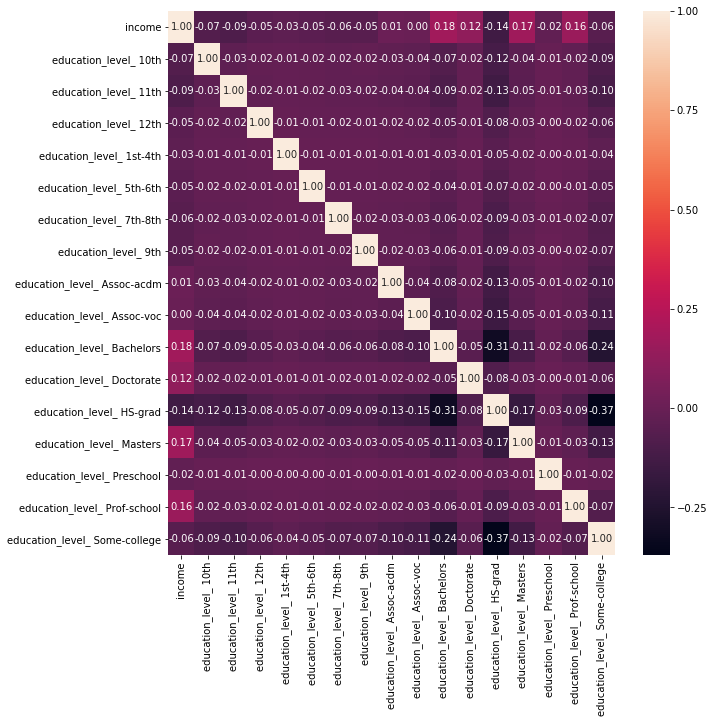

In [51]:
# heatmap for education level and income
data_edu_corr=pd.get_dummies(data.loc[:,['education_level','income']]).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_edu_corr,annot=True,fmt='.2f')
plt.show()


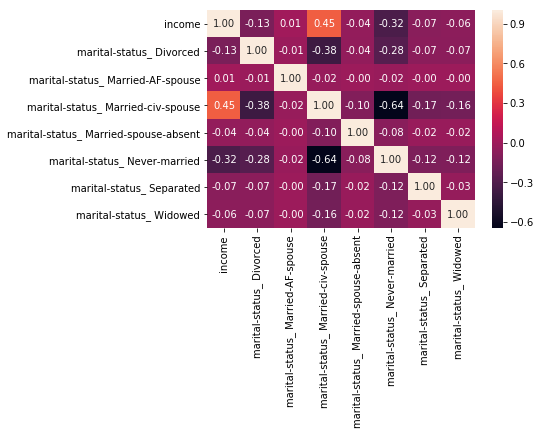

In [52]:
# heatmap for correlation between marital status categories and income
data_marital_corr=pd.get_dummies(data.loc[:,['marital-status','income']]).corr()
plt.figure()
sns.heatmap(data_marital_corr, annot=True, fmt='.2f')
plt.show()

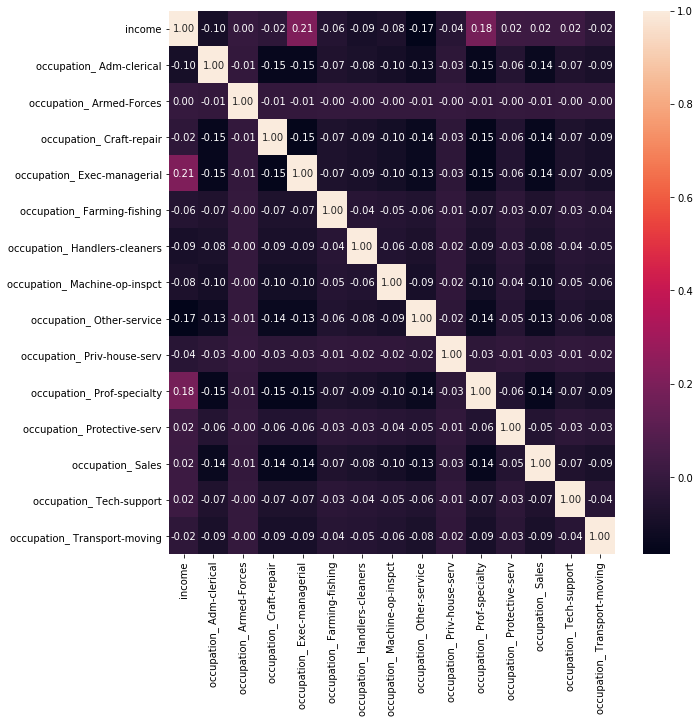

In [53]:
# heatmap for correlation between occupation  and income
data_occupation_corr=pd.get_dummies(data.loc[:,['occupation','income']]).corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_occupation_corr, annot=True, fmt='.2f')
plt.show()

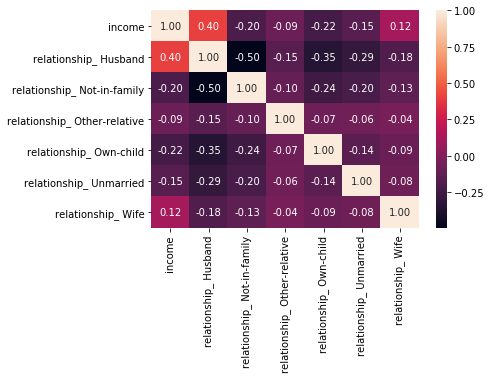

In [54]:
# heatmap for correlation between relationship and income
data_relation_corr=pd.get_dummies(data.loc[:,['relationship','income']]).corr()
plt.figure()
sns.heatmap(data_relation_corr, annot=True, fmt='.2f')
plt.show()

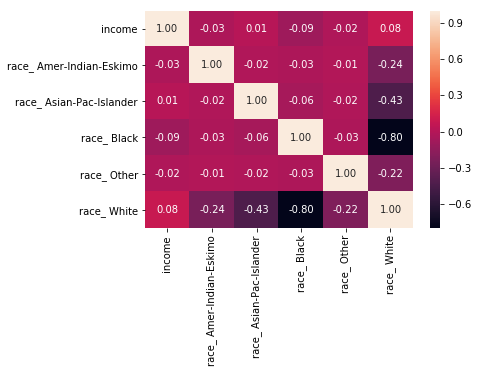

In [55]:
# heatmap of correlation between race and income
data_race_corr=pd.get_dummies(data.loc[:,['race','income']]).corr()
plt.figure()
sns.heatmap(data_race_corr, annot=True, fmt='.2f')
plt.show()

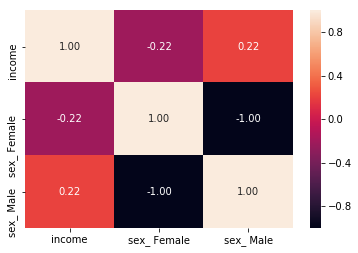

In [56]:
# heatmap of sex vs income
data_sex_corr=pd.get_dummies(data.loc[:,['sex','income']]).corr()
plt.figure()
sns.heatmap(data_sex_corr, annot=True, fmt='.2f')
plt.show()

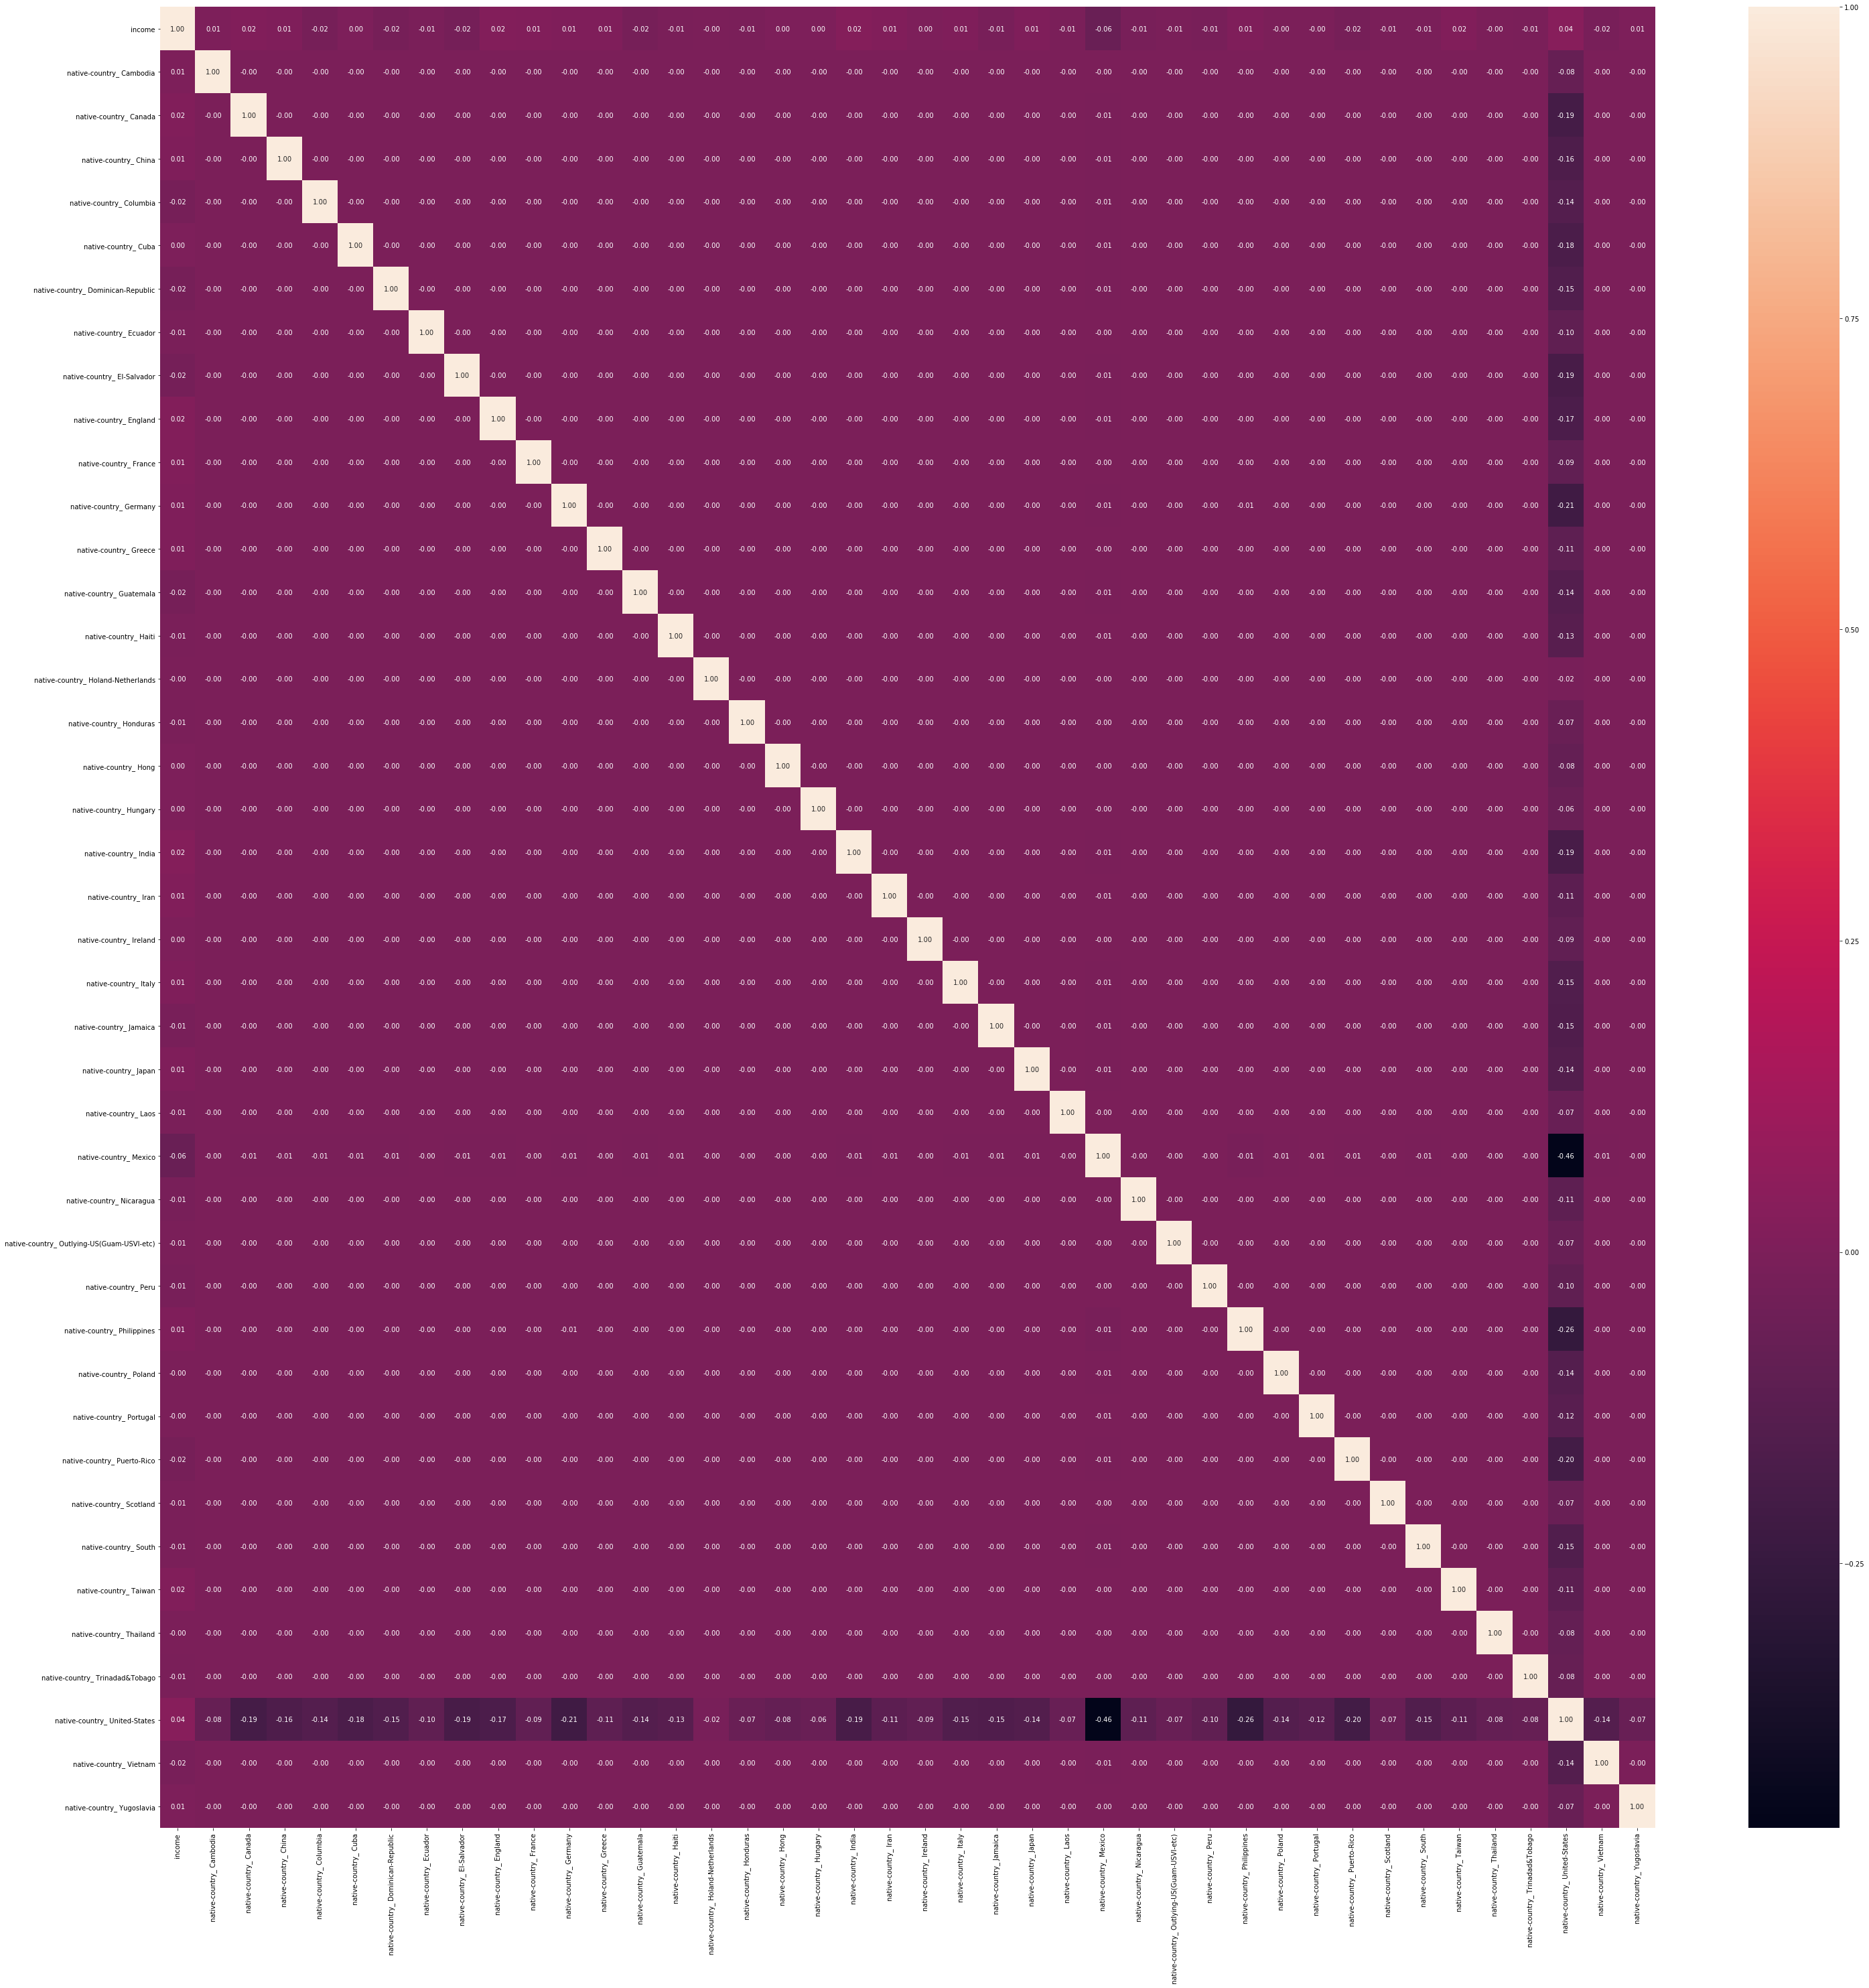

In [57]:
# heatmap of native-country vs income
data_country_corr=pd.get_dummies(data.loc[:,['native-country','income']]).corr()
plt.figure(figsize=(50,50))
sns.heatmap(data_country_corr, annot=True, fmt='.2f')
plt.show()

**top 10 features that are most correlated with income**

In [58]:
correlations=pd.get_dummies(data).corr().drop('income', axis=0)['income']

In [59]:
correlations.sort_values(ascending=False)[:10]

marital-status_ Married-civ-spouse    0.446192
relationship_ Husband                 0.403706
education-num                         0.332800
age                                   0.237040
hours-per-week                        0.227199
capital-gain                          0.221034
sex_ Male                             0.215760
occupation_ Exec-managerial           0.209176
occupation_ Prof-specialty            0.183329
education_level_ Bachelors            0.178594
Name: income, dtype: float64

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

To begin with we notice that education-num is nothing but a ranking of the education_level of the person. Thus it is not at all independent from the education_level feature but a numeric representation for it. This can also be ascertained from the fact that education-num takes integer values from 1-16, while education_level has exactly 16 categories.  

Also, notice that properties such as education, occupation and workclass of a person, are usually well correlated with each other. For e.g., a person with high education level such as a Master's degree is more probable to have a high paying occupation such as an Exec-managerial position in some private company. This implies that once we have used one of these features to estimate a person's income, using the other correlated features will increase our information only marginally. Therefore, when coming up with important features, if we assign a high feature importance to only one of the above features, we will then look for other features not so much correlated with the above features. This way we can ensure that the selected features lead to maximal gain in information. 

One way to understand the above idea is it to think about the feature selection through PCA. If we were performing PCA to reduce the number of features in our data, then we will essentially obtain features which provide largest possible variance. Clearly, if two features are correlated and we have already chosen the first feature, then the second feature will not be a direction of large variance and hence should not chosen. 

Having established the above principle to guide us in choosing the relevant features, we believe of the 13 features provided in the data, the 5 most important features in decreasing order of their relevance are: marital_status > education-num > age > hours-per-week > capital-gain   


The reasons I believe that these will be most significant are as follows:

 1) marital_status: If we assume that in cases where a person is married the income represents not just their individual salary, but the salary of the entire household, it is then highly likely that the net income of a couple is greater than 50k even though their individual incomes might be less than 50k. In fact, from looking at the correlation between income and the various features, it looks like marital_status_Married_civ_spouse has the highest correlation with income. Also, a closer look reveals that about $45\%$ people in the marital_status_Married_civ_spouse category and about $43\%$ people in the marital_status_Married_AF_spouse category have incomes higher than 50k. Similarly, the high correlation between relationship_husband and income also points in this direction. Thus, it looks like marital status will be highly important to find potential donors.   
 
 2) education-num: A person's education level also tends to highly correlate with their income. This is because a higher education makes it more likely for a person to have skills that are highly valued in the job market, therby making it possible for them to have a high paying occupation. This is also reflected in the fact that the there is a high correlation between education-num and income of a person (the explicit value was computed by us in the previous cell)
 
 Having chosen education-num as a relevant feature, we will not pay as much importance to other correlated features given by education, occupation and workclass
 
 3) age: Usually young people tend to be employed at more junior positions due to lack of sufficient experience. This implies that in general an older person who has not yet retired is much more likely to make more than 50k than somebody in their early 20's. It is also possible that retired people receive a significant pension. This is also reflected in the average age of people making more than 50k being about 44 as opposed to 36.7 for people making less than 50k. So I think age will also be an important feature to find possible donors. Again, through explicit computations, we see that age and income are quite well correlated.
 
 4) hours-per-week: Note that it is not always gauranteed that if the number of hours-per-week is large, then a person's salary is also large (for e.g. taxi-drivers and others in similar occupations might be working for a quite a large number of hours-per-week, but their income is not expected to be relatively that high). However, it is highly unlikely that someone with a low number of hours-per-week will have a high income. This is also reflected from the data, in which we found that the average number of working hours for a person making greater than 50k is 45.7 as compared to 39.4 for people making less than 50k. 
 
 5) capital-gain: Capital-gains can contribute quite significantly to a persons income. For sure, if someone's capital-gain is greater than 50k then their income will be greater than 50k. Thus someone with significant capital-gains is likely to have a large overall income. However, given that a large fraction of samples in the data have zero capital-gains, thus this feature does not seem to as important as the other 4 features we listed here.    
 
 
         
  
  

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

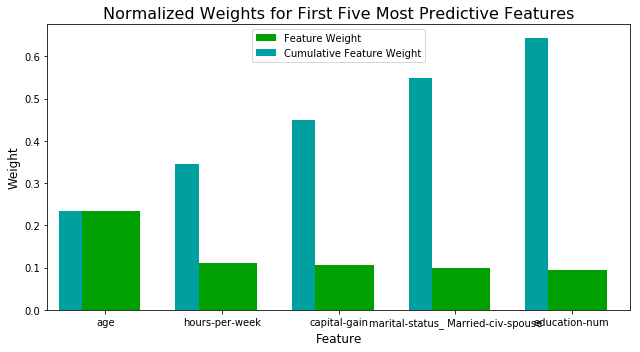

In [60]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state=seed).fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [61]:
arg_features_imp=np.argsort(importances)[::-1][:5]

In [62]:
[np.array(X_train.keys())[i] for i in arg_features_imp]

['age',
 'hours-per-week',
 'capital-gain',
 'marital-status_ Married-civ-spouse',
 'education-num']

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** 

To begin with, notice that  the data provided to the RandomForestClassifier() used One-Hot encoding of features. Hence the feature space being used by the classifiers was much more specific than the broad categories being discussed in Question 6. Thus some peculiar differences between the classifier's result and the analysis in Question 6 is unavoidable. 


The list of top 5 features we proposed is not that different from the list produced by the classifier. marital_status_Married_cv_spouse indeed appeared on the top when we computed the correlations between different features and income. In fact it was this (along with a few other things that we had already mentioned in our answer to Question 6) that inspired us to put marital status on the top of our list in Question 6. This seems to be the only difference in our list of features and that produced by the classifier. 

However, it looks like the ranking of relevance in the features is not quite the same as given by us. This might be because we based our ranking on general intuition aided by the explicit computation of correlation between income and other features (along with a few other numerical parameters we had explicitly calculated). On the otherhand the classifier will use it own metrics. This will then lead to an obvious disagreement in the ranking of the features.  


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [63]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8595
F-score on testing data: 0.7293

Final Model trained on reduced data
------
Accuracy on testing data: 0.8471
F-score on testing data: 0.6980


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

While the accuracy of the model trained only on best five features reduced from 0.86 to 0.85, the F-score reduced from 0.73 to 0.70. On the otherhand there was quite a large gain in terms of the computational time. Compared to the gain in time, the loss in performance seems to be quite insignificant and if time was a factor, which is usually the case, I will definitely consider the reduced dataset for training.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.